# Correlation Analysis

After cleaning our data, and gathering the stock price of the corresponding company, we can begin our correlation analysis before building and training our model.  

We will begin by visualizing the correlation between the sentiment of specific articles and the change in stock price from the next day.  

In [4]:
import pandas as pd

In [5]:
merged_data_df = pd.read_csv('../DataFrames/merged_data_df.tsv')

In [6]:
correlation_matrix = merged_data_df[['sentiment_title', 'sentiment_content', 'price_change']].corr()

In [7]:
correlation_matrix

,sentiment_title,sentiment_content,price_change
sentiment_title,1.000000,0.333507,-0.048338
sentiment_content,0.333507,1.000000,-0.093114
price_change,-0.048338,-0.093114,1.000000


In [8]:
# import seaborn package
import seaborn as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [15]:
# import matplotlib package
import matplotlib.pyplot as plt

<Axes: >

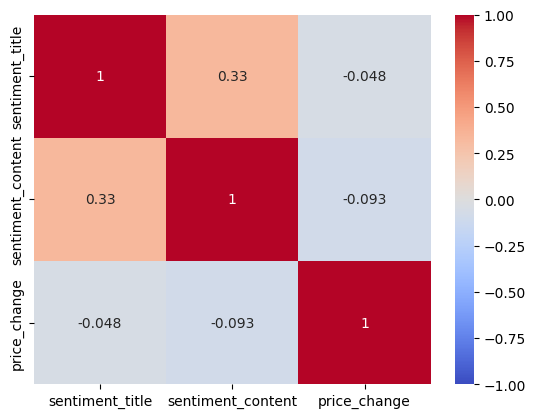

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

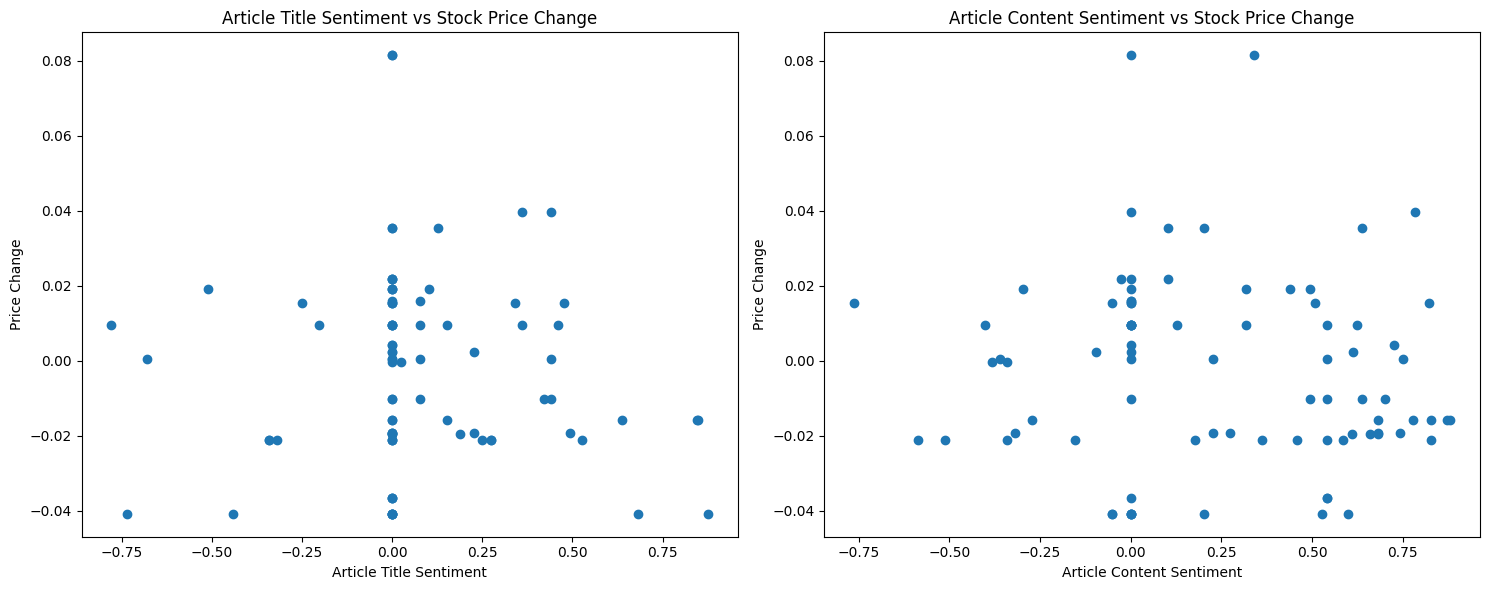

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(merged_data_df['sentiment_title'], merged_data_df['price_change'])
ax1.set_xlabel('Article Title Sentiment')
ax1.set_ylabel('Price Change')
ax1.set_title('Article Title Sentiment vs Stock Price Change')

ax2.scatter(merged_data_df['sentiment_content'], merged_data_df['price_change'])
ax2.set_xlabel('Article Content Sentiment')
ax2.set_ylabel('Price Change')
ax2.set_title('Article Content Sentiment vs Stock Price Change')

plt.tight_layout()

#### The relationship between the article title and content sentiment with the stock price change, is not very strong in either direction

We cannot assume that there is a strong relationship between the sentiment scores and the change in stock price. At least from day-to-day.  

We will attempt to see if the correlation over different time lags changes. Sentiment may have a delayed effect on stock prices.

In [22]:
max_lag = 5

In [23]:
lag_correlations = pd.DataFrame()

In [24]:
for lag in range(max_lag):
    lag_correlations[f'lag_{lag}'] = [
        merged_data_df['sentiment_title'].corr(merged_data_df['price_change'].shift(-lag)),
        merged_data_df['sentiment_content'].corr(merged_data_df['price_change'].shift(-lag))
    ]

In [25]:
lag_correlations.index = ['Title Sentiment', 'Content Sentiment']

In [26]:
lag_correlations

,lag_0,lag_1,lag_2,lag_3,lag_4
Title Sentiment,-0.048338,0.108330,0.125067,0.108977,-0.054747
Content Sentiment,-0.093114,-0.038554,-0.092717,-0.144747,-0.020325
